# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [26]:
    # Load pickled data
    import pickle

    # TODO: fill this in based on where you saved the training and testing data
    training_file = 'traffic-signs-data/train.p'
    testing_file = 'traffic-signs-data/test.p'

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    X_test, y_test = test['features'], test['labels']

In [27]:
import numpy as np
print(X_train.shape)
print(X_test.shape)
unique_items, counts = np.unique(y_train, return_counts=True)
print(len(unique_items))

(39209, 32, 32, 3)
(12630, 32, 32, 3)
43


In [28]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:]

# TODO: how many classes are in the dataset
n_classes = len(unique_items)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


(0.0, 1.0, 0.0, 1.0)

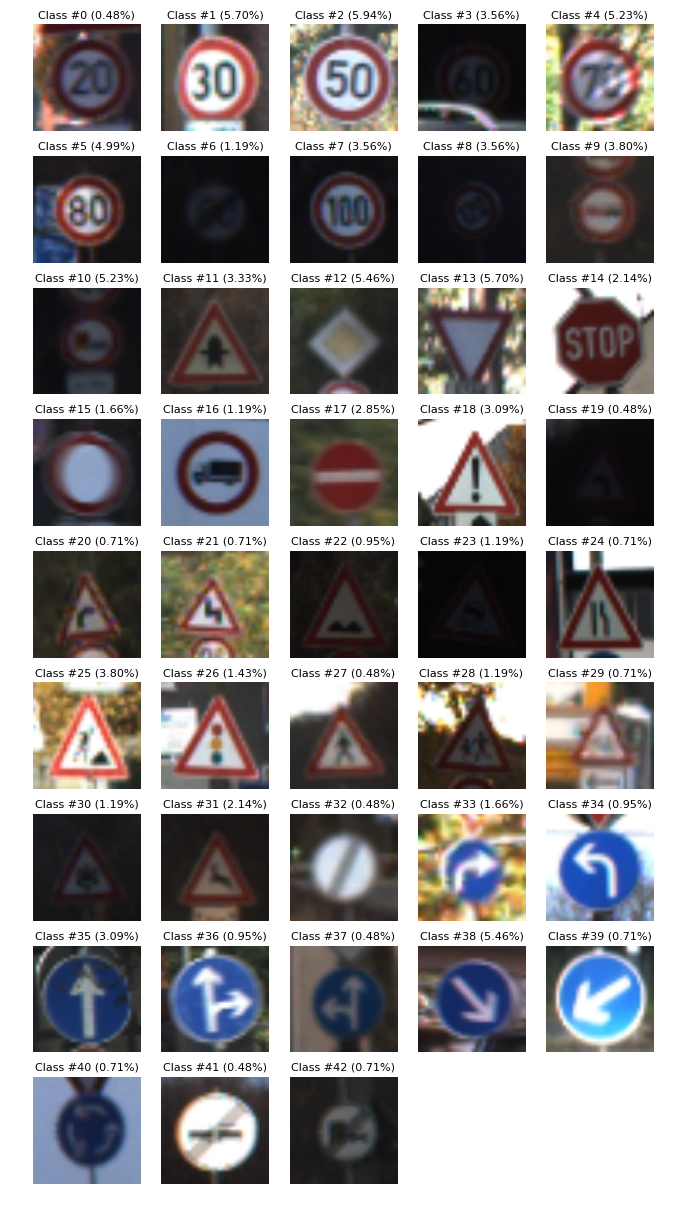

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

y_list = list(y_test)
total = len(y_list)
fig, axarr = plt.subplots(9,5, figsize=(8, 15))
i, j = 0, 0
for label in set(y_list):
    img = X_test[y_list.index(label)]
    freq = 100. * y_list.count(label) / total
    axarr[i, j].imshow(img)
    axarr[i, j].axis("off")
    axarr[i, j].set_title("Class #%d (%.2f%%)" % (label, freq), fontsize=8)
    j += 1
    if j > 4:
        j = 0
        i += 1
axarr[8, 3].axis("off")
axarr[8, 4].axis("off")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    Xmin = 0
    Xmax = 255
    a = 0.1
    b = 0.9
    return a + ((image_data-Xmin) * (b-a) / (Xmax - Xmin))



In [6]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [7]:
from sklearn.preprocessing import LabelBinarizer

# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

print('Labels One-Hot Encoded')

Labels One-Hot Encoded


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
Same to the MNIST dataset, image data is first normalized. Data label is then encoded using One-Hot Encoding.
The normalizing technique scale the image data with Min-Max to a range of [0.1, 0.9]

Numerical condition is important in the study of neural networks because ill-conditioning is a common cause of slow and inaccurate results. For good conditioned data, the negative gradient always points straight at the minimum of the error surface. Hence, training algorithms that take steps in the direction of the negative gradient are likely to work well.

As for Labels, we are using one-hot encoding. We are using softmax function to transfer classification scores to probability. The probability of the correct class will be close to 1, others will be close to zero. Each label will have a vector where the correct class has a value of 1 and all others are 0. 

In [8]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [9]:
from sklearn.model_selection import train_test_split

# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train,
    y_train,
    test_size=0.15,
    random_state=832289)

print('Training features and labels randomized and split.')

Training features and labels randomized and split.


In [10]:
import pickle
import os
pickle_file = 'traffic.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('traffic.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': train_features,
                    'train_labels': train_labels,
                    'valid_dataset': valid_features,
                    'valid_labels': valid_labels,
                    'test_dataset': X_test,
                    'test_labels': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Data cached in pickle file.


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** 85% of training data is used to train our classifier. 15% of training data is used to validate the classifier. Testing data is not touched, read in from 'traffic-signs-data/test.p'. Validation data is generated additionally to evaluate our trained classifier. By doing this, our classifier will not learn anything about testing data. Therefore, we could see whether our algorithm is general enough when it does prediction on testing data.


In [6]:
%matplotlib inline

# Load the modules
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Reload the data
pickle_file = 'traffic.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    train_dataset = pickle_data['train_dataset']
    train_labels = pickle_data['train_labels']
    valid_dataset = pickle_data['valid_dataset']
    valid_labels = pickle_data['valid_labels']
    test_dataset = pickle_data['test_dataset']
    test_labels = pickle_data['test_labels']
    del pickle_data  # Free up memory


print('Data and modules loaded.')
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Data and modules loaded.
Training set (33327, 32, 32, 3) (33327, 43)
Validation set (5882, 32, 32, 3) (5882, 43)
Test set (12630, 32, 32, 3) (12630, 43)


In [25]:
epochs = 170
batch_size = 256
patch_size = 3
image_size = 32
num_channels = 3
depth = 64
num_hidden = 512
num_hidden1 = 384
num_labels = 43

graph = tf.Graph()
def inference(data):
    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal(
        [patch_size, patch_size, num_channels, depth], stddev=0.1))
    layer1_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    layer2_weights = tf.Variable(tf.truncated_normal(
        [patch_size, patch_size, depth, depth], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    layer3_weights = tf.Variable(tf.truncated_normal(
        [image_size // 8 * image_size // 8 * depth, num_hidden], stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(0.5, shape=[num_hidden]))
    layer4_weights = tf.Variable(tf.truncated_normal(
        [num_hidden, num_hidden1], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(0.3, shape=[num_hidden1]))
    layer5_weights = tf.Variable(tf.truncated_normal(
        [num_hidden1, num_labels], stddev=0.1))
    layer5_biases = tf.Variable(tf.constant(0.3, shape=[num_labels]))    

    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    #maxpool = tf.nn.max_pool(hidden, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    maxpool1 = tf.nn.max_pool(hidden, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv = tf.nn.conv2d(maxpool1, layer2_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    h_fc1_drop = tf.nn.dropout(hidden, 0.75)
    hidden1 = tf.nn.relu(tf.matmul(h_fc1_drop, layer4_weights) + layer4_biases)
    return tf.matmul(hidden1, layer5_weights) + layer5_biases

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Model architecture: Input layer -> Conv layer+RELU(depth=64) -> Maxpool -> Conv layer+RELU(depth=64) -> FC(depth=512) -> Dropout -> FC(depth=384) -> FCFC(depth=43)


In [26]:
### Train your model here.
### Feel free to use as many code cells as needed.
new_images= np.zeros((1, 32, 32, 3))
new_labels= np.zeros((1,43))

with graph.as_default():
    #  Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)
    tf_valid_labels = tf.constant(valid_labels)
    tf_test_labels = tf.constant(test_labels)
    tf_new_dataset = tf.constant(new_images)
    tf_new_labels = tf.constant(new_labels)
    #keep_prob = tf.placeholder(tf.float32)

    # Training computation.
    logits = inference(tf_train_dataset)
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
    # Optimizer.
    learning_rate = 0.01
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_op)
    correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(tf_train_labels,1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    tf_valid_dataset = tf.cast(tf_valid_dataset, tf.float32)
    tf_test_dataset = tf.cast(tf_test_dataset, tf.float32)
    tf_new_dataset = tf.cast(tf_new_dataset, tf.float32)
    tf_valid_labels = tf.cast(tf_valid_labels, tf.float32)
    tf_test_labels = tf.cast(tf_test_labels, tf.float32)
    logits_valid = inference(tf_valid_dataset)
    logits_test = inference(tf_test_dataset)
    logits_new = inference(tf_new_dataset)
    valid_prediction = tf.nn.softmax(logits_valid)
    test_prediction = tf.nn.softmax(logits_test)
    new_prediction = tf.nn.softmax(logits_new)


In [27]:
def eval_data(dataset,labels):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    shape = dataset.shape
    steps_per_epoch = shape[0] // batch_size
    num_examples = steps_per_epoch * batch_size
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = labels[offset:(offset + batch_size), :]
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={tf_train_dataset: batch_data, tf_train_labels: batch_labels})
        total_acc += (acc * batch_data.shape[0])
        total_loss += (loss * batch_data.shape[0])
    return total_loss/num_examples, total_acc/num_examples


In [28]:
with tf.Session(graph=graph) as sess:
    #saver = tf.train.Saver()
    sess.run(tf.initialize_all_variables())
    print('Initialized')
    steps_per_epoch = train_dataset.shape[0] // batch_size
    num_examples = steps_per_epoch * batch_size

    # Train model
    for i in range(epochs):
        for step in range(steps_per_epoch):
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            loss = sess.run(train_op, feed_dict={tf_train_dataset: batch_data, tf_train_labels: batch_labels})

        val_loss, val_acc = eval_data(valid_dataset, valid_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation loss = {}".format(val_loss))
        print("Validation accuracy = {}".format(val_acc))
    # Evaluate on the test data
    test_loss, test_acc = eval_data(test_dataset, test_labels)
    print("Test loss = {}".format(test_loss))
    print("Test accuracy = {}".format(test_acc))
    #saver.save(sess, "traffic_sign_cnn_clf.ckpt")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
EPOCH 1 ...
Validation loss = 3.4362513585524126
Validation accuracy = 0.087890625
EPOCH 2 ...
Validation loss = 3.248538689179854
Validation accuracy = 0.14577414772727273
EPOCH 3 ...
Validation loss = 3.1442508805881846
Validation accuracy = 0.17009943181818182
EPOCH 4 ...
Validation loss = 2.9786278117786753
Validation accuracy = 0.19939630681818182
EPOCH 5 ...
Validation loss = 2.7967233549464834
Validation accuracy = 0.24875710227272727
EPOCH 6 ...
Validation loss = 2.6954227035695855
Validation accuracy = 0.27734375
EPOCH 7 ...
Validation loss = 2.62798396023837
Validation accuracy = 0.2688210227272727
EPOCH 8 ...
Validation loss = 2.312201564962214
Validation accuracy = 0.3430397727272727
EPOCH 9 ...
Validation loss = 2.20509491183541
Validation accuracy = 0.3673650568181818
EPOCH 10 ...
Validation loss = 2.109643426808444
Validation accuracy = 0.38121448863636365
EPOCH 11 ...
Validation loss =

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
optimizer is gradient descend optimizer with a learning rate of 0.01. 

batch size is 256. 

When epochs is around 170, validation loss reaches minimum, stop to prevent over-fitting.

some parameters like depth of each layer, learning rate was tuned to get the best test accuracy.


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
Image shows relatively constraint viariablities in appearance. Challenges are due to real-world viariances, such as view-point, lighting reflections, resolutions, physical damages, grafiti etc. Therefore, this problem should be simillar with the MNIST problem. However, the number of lables in this problem is bigger. To approach the solution, I am taking the CNN model from Udacity's Deep learning course and looking for optimum CNN layer depth numbers.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

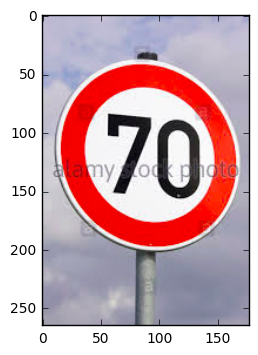

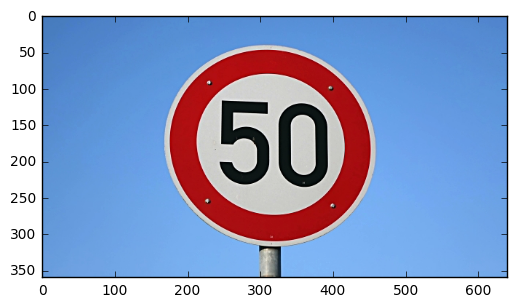

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_files = os.listdir("internet/")
for image_file in image_files:
    img=mpimg.imread("internet/"+image_file)
    imgplot = plt.imshow(img)
    plt.show()

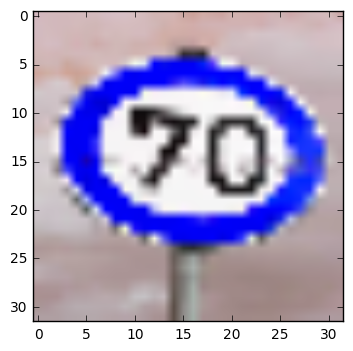

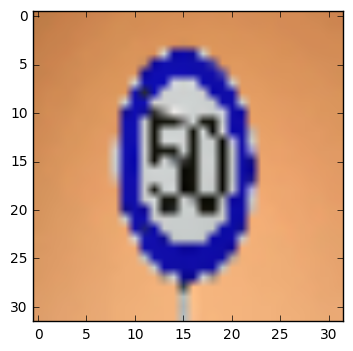

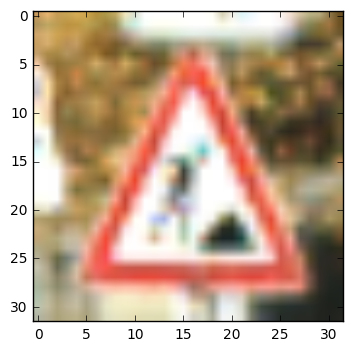

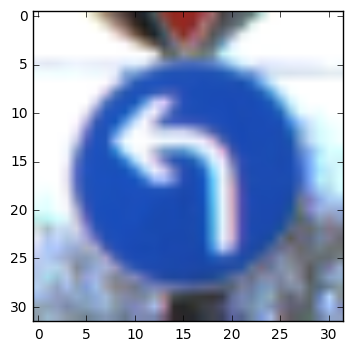

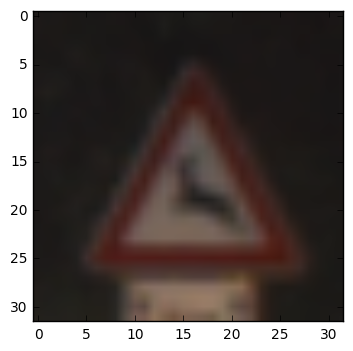

In [34]:
import cv2
import numpy as np

def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    Xmin = 0
    Xmax = 255
    a = 0.1
    b = 0.9
    return a + ((image_data-Xmin) * (b-a) / (Xmax - Xmin))

new_images = []

# Show each image
for image in image_files:
    image = './internet/' + image
    img = cv2.imread(image)
    img = cv2.resize(img, (32,32))
    plt.imshow(img)
    plt.show()
    img = normalize(img) 
  
    # Append to the test_images array
    new_images.append(img)

import pickle

testing_file = 'traffic-signs-data/test.p'
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

new_labels=[34,25,31]
new_list=list(new_labels)
X_test, y_test = test['features'], test['labels']
y_list = list(y_test)

for label in set(new_list):
    img = X_test[y_list.index(label)]
    plt.imshow(img)
    plt.show()
    img = normalize(img)
    new_images.append(img)
    
# convert to numpy array
new_images = np.asarray(new_images, dtype=np.float32)

#print(type(new_images))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:** I chose 5 images. 2 are from internet, 3 from test dataset. Some challenges could be shape of the sign, the background color of the image, or the angel of the image taken, or the distance from which the image was taken. I put in images from test dataset in order to compare the model's performance.

In [35]:
#repeat 128 times so data becomes bigger then batch size

image_label4=np.broadcast_to(new_images[0],[256,32,32,3])
image_label2=np.broadcast_to(new_images[1],[256,32,32,3])
image_label34=np.broadcast_to(new_images[2],[256,32,32,3])
image_label25=np.broadcast_to(new_images[3],[256,32,32,3])
image_label31=np.broadcast_to(new_images[4],[256,32,32,3])


In [36]:
epochs = 170
batch_size = 256
patch_size = 3
image_size = 32
num_channels = 3
depth = 64
num_hidden = 512
num_hidden1 = 384
num_labels = 43

graph = tf.Graph()
def inference(data):
    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal(
        [patch_size, patch_size, num_channels, depth], stddev=0.1))
    layer1_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    layer2_weights = tf.Variable(tf.truncated_normal(
        [patch_size, patch_size, depth, depth], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    layer3_weights = tf.Variable(tf.truncated_normal(
        [image_size // 8 * image_size // 8 * depth, num_hidden], stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(0.5, shape=[num_hidden]))
    layer4_weights = tf.Variable(tf.truncated_normal(
        [num_hidden, num_hidden1], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(0.3, shape=[num_hidden1]))
    layer5_weights = tf.Variable(tf.truncated_normal(
        [num_hidden1, num_labels], stddev=0.1))
    layer5_biases = tf.Variable(tf.constant(0.3, shape=[num_labels]))    

    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    #maxpool = tf.nn.max_pool(hidden, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    maxpool1 = tf.nn.max_pool(hidden, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv = tf.nn.conv2d(maxpool1, layer2_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    h_fc1_drop = tf.nn.dropout(hidden, 0.75)
    hidden1 = tf.nn.relu(tf.matmul(h_fc1_drop, layer4_weights) + layer4_biases)
    return tf.matmul(hidden1, layer5_weights) + layer5_biases

In [37]:
### Train your model here.
### Feel free to use as many code cells as needed.

with graph.as_default():
    #  Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)
    tf_valid_labels = tf.constant(valid_labels)
    tf_test_labels = tf.constant(test_labels)
    tf_new_dataset = tf.constant(new_images)
    tf_image_label4 = tf.constant(image_label4)
    tf_image_label2 = tf.constant(image_label2)
    tf_image_label34 = tf.constant(image_label34)
    tf_image_label25 = tf.constant(image_label25)
    tf_image_label31 = tf.constant(image_label31)

    # Training computation.
    logits = inference(tf_train_dataset)
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
    # Optimizer.
    learning_rate = 0.01
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_op)
    correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(tf_train_labels,1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    tf_valid_dataset = tf.cast(tf_valid_dataset, tf.float32)
    tf_test_dataset = tf.cast(tf_test_dataset, tf.float32)
    tf_new_dataset = tf.cast(tf_new_dataset, tf.float32)
    tf_valid_labels = tf.cast(tf_valid_labels, tf.float32)
    tf_test_labels = tf.cast(tf_test_labels, tf.float32)
    logits_valid = inference(tf_valid_dataset)
    logits_test = inference(tf_test_dataset)
    logits_label2 = inference(tf_image_label2)
    logits_label4 = inference(tf_image_label4)
    logits_label25 = inference(tf_image_label25)
    logits_label31 = inference(tf_image_label31)
    logits_label34 = inference(tf_image_label34)

    #logits_new = inference(tf_new_dataset)
    valid_prediction = tf.nn.softmax(logits_valid)
    #test_prediction = tf.nn.softmax(logits_test)
    #new_prediction = tf.nn.softmax(logits_new)
    label2_prediction = tf.nn.softmax(logits_label2)
    label4_prediction = tf.nn.softmax(logits_label4)
    label25_prediction = tf.nn.softmax(logits_label25)
    label31_prediction = tf.nn.softmax(logits_label31)
    label34_prediction = tf.nn.softmax(logits_label34)


In [38]:
def eval_data(dataset,labels):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    shape = dataset.shape
    steps_per_epoch = shape[0] // batch_size
    num_examples = steps_per_epoch * batch_size
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = labels[offset:(offset + batch_size), :]
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={tf_train_dataset: batch_data, tf_train_labels: batch_labels})
        total_acc += (acc * batch_data.shape[0])
        total_loss += (loss * batch_data.shape[0])
    return total_loss/num_examples, total_acc/num_examples


In [39]:
with tf.Session(graph=graph) as sess:
    #saver = tf.train.Saver()
    sess.run(tf.initialize_all_variables())
    print('Initialized')
    steps_per_epoch = train_dataset.shape[0] // batch_size
    num_examples = steps_per_epoch * batch_size

    # Train model
    for i in range(epochs):
        for step in range(steps_per_epoch):
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            loss = sess.run(train_op, feed_dict={tf_train_dataset: batch_data, tf_train_labels: batch_labels})

        val_loss, val_acc = eval_data(valid_dataset, valid_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation loss = {}".format(val_loss))
        print("Validation accuracy = {}".format(val_acc))
    # Evaluate on the test data
    #test_loss, test_acc = eval_data(test_dataset, test_labels)    
    #test_loss, test_acc = eval_data(new_images, new_labels)
    value, indices = tf.nn.top_k(label2_prediction, k=5)
    print("top 5 value of label2 images= {}".format(value.eval()))
    print("top 5 value indices of label2 images= {}".format(indices.eval()))
    value, indices = tf.nn.top_k(label4_prediction, k=5)
    print("top 5 value of label4 images= {}".format(value.eval()))
    print("top 5 value indices of label4 images= {}".format(indices.eval()))
    value, indices = tf.nn.top_k(label25_prediction, k=5)
    print("top 5 value of label25 images= {}".format(value.eval()))
    print("top 5 value indices of label25 images= {}".format(indices.eval()))
    value, indices = tf.nn.top_k(label31_prediction, k=5)
    print("top 5 value of label31 images= {}".format(value.eval()))
    print("top 5 value indices of label31 images= {}".format(indices.eval()))
    value, indices = tf.nn.top_k(label34_prediction, k=5)
    print("top 5 value of label34 images= {}".format(value.eval()))
    print("top 5 value indices of label34 images= {}".format(indices.eval()))
    #print("top 10 value from test dataset= {}".format(value_test.eval()))
    #print("top 10 value indices from test dataset= {}".format(indices_test.eval()))
    #print("Test loss = {}".format(test_loss))
    #print("Test accuracy = {}".format(test_acc))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
EPOCH 1 ...
Validation loss = 3.5195500308817085
Validation accuracy = 0.06818181818181818
EPOCH 2 ...
Validation loss = 3.413584915074435
Validation accuracy = 0.10422585227272728
EPOCH 3 ...
Validation loss = 3.2956054752523247
Validation accuracy = 0.12819602272727273
EPOCH 4 ...
Validation loss = 3.2799853411587803
Validation accuracy = 0.1299715909090909
EPOCH 5 ...
Validation loss = 3.083883751522411
Validation accuracy = 0.16459517045454544
EPOCH 6 ...
Validation loss = 3.0254967754537407
Validation accuracy = 0.18022017045454544
EPOCH 7 ...
Validation loss = 2.769384828480807
Validation accuracy = 0.24200994318181818
EPOCH 8 ...
Validation loss = 2.654353911226446
Validation accuracy = 0.27734375
EPOCH 9 ...
Validation loss = 2.5814795710823755
Validation accuracy = 0.2805397727272727
EPOCH 10 ...
Validation loss = 2.375954606316306
Validation accuracy = 0.31782670454545453
EPOCH 11 ...
Valida

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset?_


**Answer:** 
The model does not perform well on captured pictures. 
The model does not perform well neither on the selected images from test dataset. 
Even though, the overall accuracy on test dataset is roughly 84%.
Label2 image is from internet. It is wrongly classified as 11/33/3 with a confidence of 90%+.
Label4 image is from internet. It is wrongly classified as 21/33/27/29 with a confidence of 85%-99%.

Label25 image is from test dataset. It is wrongly classified as 0/1/32 with a confidence of 66.7%.
Label31 image is from test dataset. It is wrongly classified as 41/33/22 with a confidence of 40-99%.
Label34 image is from test dataset. It is wrongly classified as 3/4 with a confidence of 40-91%. 


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


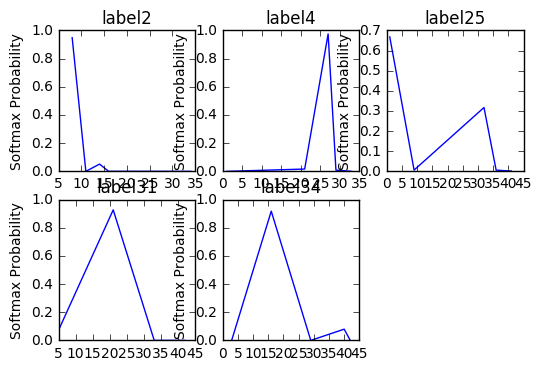

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

%matplotlib inline

lb2_val = np.asarray([9.48267877e-01, 1.32492403e-06,  5.14664091e-02,  2.62431073e-04, 1.18910725e-06])
lb2_idx = np.asarray([ 8, 11, 14, 16, 34])
lb4_val = np.asarray([1.94216932e-06,   1.63620077e-02, 9.74984527e-01,   8.63584876e-03,   1.42467788e-05])
lb4_idx = np.asarray([ 1, 21, 27, 29, 33 ])
lb25_val = np.asarray([0.66777545,  0.00636661, 0.31711543,   0.00591293,  0.00167207])
lb25_idx = np.asarray([ 1, 9, 32, 36, 41])
lb31_val = np.asarray([ 7.20231235e-02, 9.26693857e-01,  2.94895261e-04,   7.34321657e-04,    1.23034682e-04])
lb31_idx = np.asarray([5, 21, 33, 41, 42])
lb34_val = np.asarray([2.20663822e-03, 9.17524099e-01,  2.67154945e-04, 7.99988359e-02,  1.70806868e-06])
lb34_idx = np.asarray([3, 16, 29, 40, 42])

plt.subplot(231)
plt.plot(lb2_idx, lb2_val)
plt.ylabel('Softmax Probability')
plt.title('label2')

plt.subplot(232)
plt.plot(lb4_idx, lb4_val)
plt.ylabel('Softmax Probability')
plt.title('label4')

plt.subplot(233)
plt.plot(lb25_idx, lb25_val)
plt.ylabel('Softmax Probability')
plt.title('label25')

plt.subplot(234)
plt.plot(lb31_idx, lb31_val)
plt.ylabel('Softmax Probability')
plt.title('label31')

plt.subplot(235)
plt.plot(lb34_idx, lb34_val)
plt.ylabel('Softmax Probability')
plt.title('label34')



**Answer:**
The model seems to be certain of its prediction.
In the cases where the model was incorrect in the initial prediction, the correct prediction does not show up in top k.



### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

code is provided concerning loading new images.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.